## Imported Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.dummy import DummyClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [2]:
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(12,8)

## **Exploratory Data Analysis**  

In [5]:
oilSpill_df = pd.read_csv('oil_spill.csv')
oilSpill_df.head()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
0,1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


In [6]:
oilSpill_df.shape

(937, 50)

Check for Duplicates and nulls 

In [7]:
oilSpill_df.duplicated().any()

False

In [8]:
oilSpill_df.isnull().sum().any()

False

Check for redundant features

In [9]:
oilSpill_df.sum()

f_1       7.644800e+04
f_2       3.118730e+05
f_3       6.546885e+05
f_4       8.161197e+05
f_5       7.882200e+04
f_6       7.212055e+08
f_7       4.051843e+04
f_8       8.552830e+03
f_9       3.692448e+06
f_10      2.070800e+02
f_11      1.029695e+05
f_12      2.356000e+02
f_13      2.916100e+02
f_14      4.541300e+02
f_15      1.713700e+02
f_16      2.829100e+02
f_17      7.253557e+04
f_18      2.918935e+04
f_19      8.517700e+02
f_20      2.144000e+02
f_21      2.710900e+02
f_22      7.129223e+04
f_23      0.000000e+00
f_24      6.017200e+02
f_25      5.246363e+05
f_26      5.418600e+02
f_27      7.025810e+03
f_28      5.700700e+02
f_29      4.002030e+03
f_30     -2.650230e+03
f_31     -4.018500e+02
f_32      1.709640e+03
f_33      2.610000e+00
f_34      1.707020e+03
f_35      4.037200e+04
f_36      2.279430e+06
f_37      6.460000e+00
f_38      2.927362e+04
f_39      8.544500e+04
f_40      5.673300e+04
f_41      8.750912e+05
f_42      4.006290e+05
f_43      2.393434e+05
f_44      9

Feature f_23 is redundant and can be discarded. f_1 is the patch identifier and can also be discarded  

In [10]:
#Adjusting Feature data set to exclude f_1 and f_23
X = oilSpill_df.drop(['f_1', 'f_23', 'target'], axis=1)
X.shape

(937, 47)

In [11]:
#Label data set
y = oilSpill_df['target']
y.shape

(937,)

Percentage Oil Spill vs Non Oil Spill

([<matplotlib.patches.Wedge at 0x252db3c75f8>,
 [Text(-1.089623119069057, 0.150736387080955, 'No-Spill'),
  Text(1.0896231225972965, -0.15073636157648557, 'Oil-Spill')],
 [Text(-0.5943398831285766, 0.08221984749870272, '95.62%'),
  Text(0.5943398850530708, -0.08221983358717393, '4.38%')])

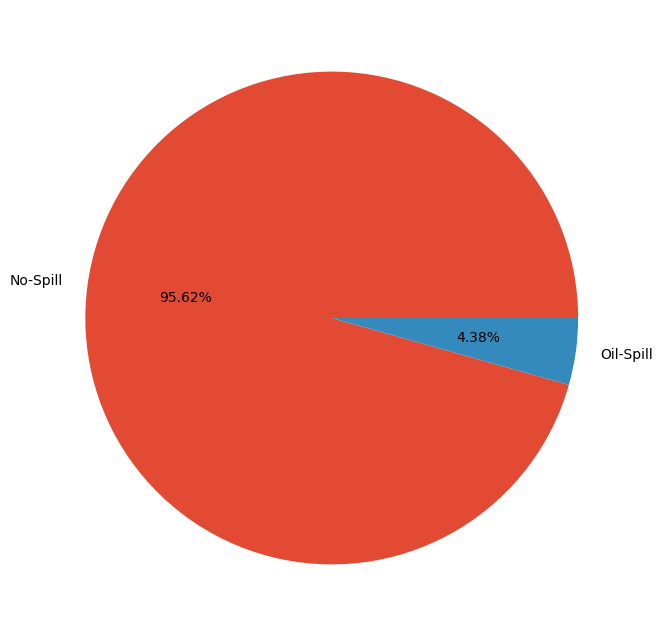

In [12]:
pie_data = oilSpill_df['target'].value_counts()
plt.pie(pie_data, labels=['No-Spill', 'Oil-Spill'], autopct='%0.2f%%', radius=1) 

Value counts

In [13]:
y.value_counts()[0]

896

In [14]:
y.value_counts()[1]

41

Plotting distributions of each variables

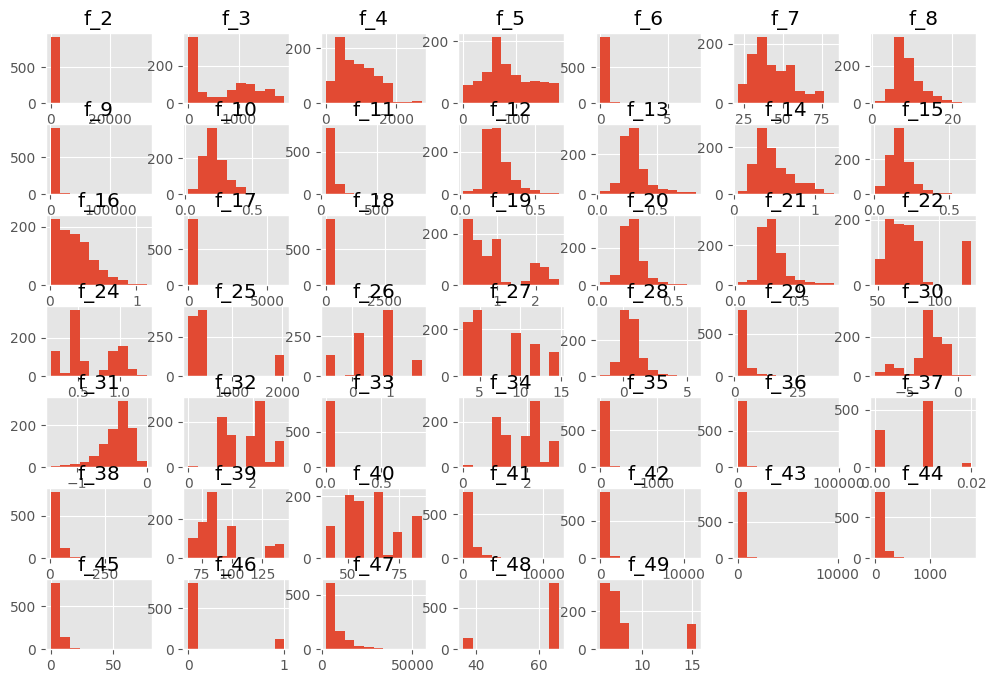

In [15]:
var_dist = X.hist()

Each feature has a different distribution. Some display Gaussian properties (eg. f_5, f_8, f_13), whereas others are discrete (eg. f_35, f_36, f_42) or exponential (eg. f_16, f_31)  

## Building a Dummy Classifier 

Dummy classifier acts as a baseline model used to compare the performance of subsequent classification models. It looks at the label with most frequent occurrences in the training set and makes predictions based on that label. From above, given that over 95% of labels are non-oil spill, we would expect the dummy classifier to perform well for non-oil spills, but incur many false negatives for oil spills.      

In [16]:
#Preparing Training and Test sets for X (feature data) and y (target/label data)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

Mean of Geometric-Mean: 0.465 (stdev 0.210)
Classification_report: 

               precision    recall  f1-score   support

           0       0.96      0.49      0.65       180
           1       0.04      0.50      0.08         8

    accuracy                           0.49       188
   macro avg       0.50      0.49      0.36       188
weighted avg       0.92      0.49      0.62       188



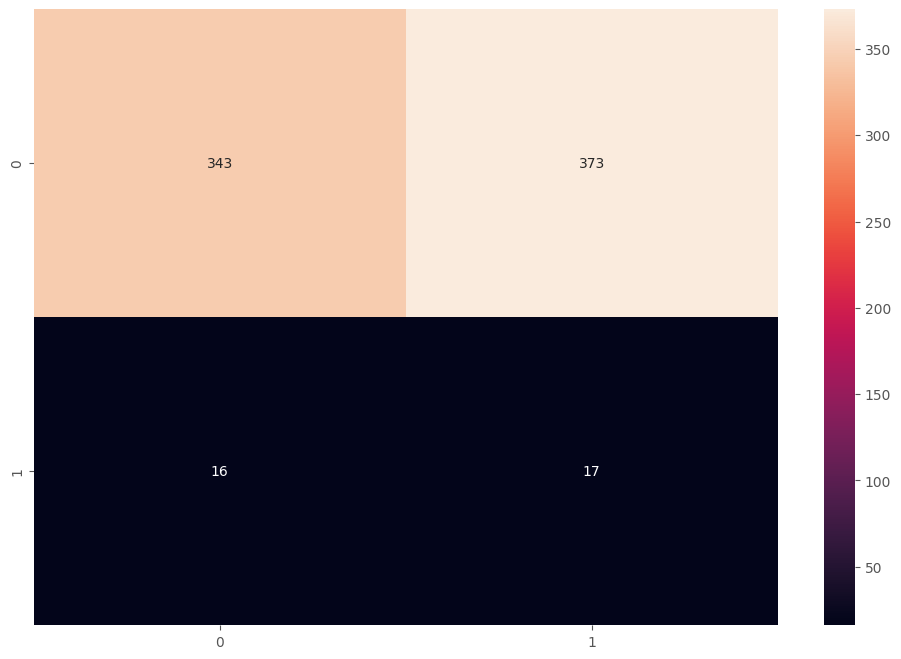

In [17]:
#Setting up Stratified K-fold cross validation for the feature set using skLearn
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 

#Setting the metric to use the mean accuracy score of each cross validation iteration 
metric = make_scorer(geometric_mean_score)

#Building the dummyClassifier using skLearn
dummyClassifier = DummyClassifier(strategy='uniform', random_state=42) #establishing random state for re-produceability
dummyClassifier.fit(X_train, y_train) 
#Training the dummy classifier
classification_scores = cross_val_score(dummyClassifier, X_train, y_train, scoring=metric, cv=cv, n_jobs=-1)

#Calculating the mean and stdev of the model's geometric mean scores. 
mean = np.mean(classification_scores)
std = np.std(classification_scores) #stdev tells us whether model is bias vs highly variable 
                                    #It is an indicator for tuning k value (n_splits) in cross validation

#making predictions using dummy classifier for f1 score.
y_pred=dummyClassifier.predict(X_test)
    
#Printing the results    
print('Mean of Geometric-Mean: %.3f (stdev %.3f)' % (mean, std))
print(f'Classification_report: \n\n {classification_report(y_test,y_pred)}')
cm = confusion_matrix(y_train, dummyClassifier.predict(X_train))
f = sns.heatmap(cm, annot=True, fmt='d')

As expected, the precision for oil spills is only 4% and its f1 score is very low for oil spills. This is due to the class imbalance and thus the bias toward classifying non oil spills. 

The best metrics to evaluate the models are thus the mean of the geometric mean or the f1 score which is the harmonic mean of prcision and recall. Model accuracy is a useless measure because it is more likely to predict non-oil spills.

Sample Procedure for plotting confusion matrix

In [18]:
#Sample class for plotting confusion matrix

def plot_confusion_normal(model, name, classes, train_x, train_y, 
                          test_x, test_y, cmap=plt.cm.Greens):
    '''
    Fuction plota grid and calls the plot_confusion_matrix function
    to plot two confusion matrices. One for the tarin set and another
    for the test set

    Parameters
    ----------
    cm: sklearn confusion matrix
    classes: numpy 1D array containing all unique class names

    Examples
    ----------
    >>>> plot_confusion_normal(xg_model, train_x, train_y)
    >>>> plot_confusion_normal(rf_model, train_x, train_y)
    '''

    # Set the plot size
    rcParams['figure.figsize'] = (15.0, 10.0)

    # Set up grid
    plt.figure()
    fig = gridspec.GridSpec(3, 3)
    grid_length = list(range(1, 3))
    tuple_grid = [(i, j) for i in grid_length for j in grid_length]

    # Plot Training Confusion Matrix
    plt.subplot2grid((3, 3), (0, 0))
    cm = confusion_matrix(train_y, model.predict(train_x))
    plot_confusion_matrix(
        cm,
        classes,
        fontsize=10,
        normalize=True,
        title=name.capitalize() + ': Train Set',
        cmap=cmap)

    # Plot Testing Confusion Matrix
    plt.subplot2grid((3, 3), (0, 1))
    cm = confusion_matrix(test_y, model.predict(test_x))
    plot_confusion_matrix(
        cm,
        classes,
        fontsize=10,
        normalize=True,
        title=name.capitalize() + ': Test Set',
        cmap=cmap)

    return None

Method for evaluating model score with geometric mean score being default metric. Due to class imbalance, stratified k fold cross validation is used to train the model so that the class imbalance is preserved in the training and test sets.  

In [19]:
def eval_model_crossVal(model, x_train, y_train, scorer = make_scorer(geometric_mean_score)):
    
    #Fitting the model with training data
    model.fit(x_train, y_train)     
    
    #Setting up Stratified K-fold cross validation for the feature set using skLearn
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 

    #Training the fitted model
    classification_scores = cross_val_score(model, x_train, y_train, scoring=scorer, cv=cv, n_jobs=-1)

    #running predictions on fitted model 
    y_pred=model.predict(X_test)
    
    return classification_scores, y_pred    


Method for evaluating accuracy scores with geometric mean score being default metric. 

In [20]:
#Method for evaluating Gradient Based Descent models such as Logistic & Regression and Linear Discriminant Analysis
#These are for models created using imblearn Pipeline library 
def eval_GDB_models(model, x_train, y_train, x_test, y_test):

    #Fitting the model with training data
    model.fit(x_train, y_train)     

    #calculating classification scores using cross validation, accuracy metric
    cross_val_scores, y_predicted = eval_model_crossVal(model, x_train, y_train, 'accuracy')
    #print(cross_val_scores)

    #Calculating the mean and stdev of the model's geometric mean scores. 
    mean = np.mean(cross_val_scores)
    std = np.std(cross_val_scores) #stdev tells us whether model is bias vs highly variable 
                                   #It is an indicator for tuning k value (n_splits) in cross validation

     
    #calculating the Pipeline score Accuracy value     
    pipeline_score = model.score(x_test, y_test)         

    return mean, std, pipeline_score, y_predicted  

## Checking Performance of other Algorithms

In [21]:
  def get_models():
         
    models, names = list(), list()

    steps = [('scaler',StandardScaler()),('m',LogisticRegression(solver='liblinear'))]
    models.append(Pipeline(steps=steps))
    names.append('LR')
    
    steps = [('scaler', StandardScaler()),('m',LinearDiscriminantAnalysis())]
    models.append(Pipeline(steps=steps))
    names.append('LDA')
    
    models.append(GaussianNB())
    names.append('NB')
    
    models.append(RandomForestClassifier())
    names.append('RFC')
    
    models.append(XGBClassifier())
    names.append('XGB')
    
    models.append(LGBMClassifier())
    names.append('lGB')
 
    return models, names    
    

### Comparing Accuracy of Logistic Regression and LDA using cross_val_score and pipeline libraries. 

Logistic Regression

In [22]:
steps = [('t',StandardScaler()),('m',LogisticRegression(solver='liblinear'))]
LR_Model = Pipeline(steps=steps)
mean, std, pipeline_score, y_pred = eval_GDB_models(LR_Model, X_train, y_train, X_test, y_test)
#Printing the results    
print('Cross Validation Score Mean: %.3f (stdev %.3f), Pipeline Score %.3f' % (mean, std, pipeline_score))
print(f'Classification_report: \n\n {classification_report(y_test,y_pred)}')

Cross Validation Score Mean: 0.968 (stdev 0.015), Pipeline Score 0.957
Classification_report: 

               precision    recall  f1-score   support

           0       0.97      0.98      0.98       180
           1       0.50      0.38      0.43         8

    accuracy                           0.96       188
   macro avg       0.74      0.68      0.70       188
weighted avg       0.95      0.96      0.95       188



Linear Discriminant Analysis

In [23]:
steps = [('scaler', StandardScaler()),('m',LinearDiscriminantAnalysis())]
LDA_Model = Pipeline(steps=steps)
mean, std, pipeline_score, y_pred = eval_GDB_models(LDA_Model, X_train, y_train, X_test, y_test) 
#Printing the results    
print('Cross Validation Score Mean: %.3f (stdev %.3f), Pipeline Score %.3f' % (mean, std, pipeline_score))
print(f'Classification_report: \n\n {classification_report(y_test,y_pred)}')

Cross Validation Score Mean: 0.964 (stdev 0.017), Pipeline Score 0.963
Classification_report: 

               precision    recall  f1-score   support

           0       0.98      0.98      0.98       180
           1       0.57      0.50      0.53         8

    accuracy                           0.96       188
   macro avg       0.77      0.74      0.76       188
weighted avg       0.96      0.96      0.96       188



The Accuracy scores for both cross_val_score and pipeline libraries are close, and they are both reflect an Accuracy score close to that in the classification report. However given the class imbalance accuracy is not a good indicator of model performance. Rather the f1 score (harmonic mean) is a key indicator of how well the model is performing on identifying and predicting oil spill, with geometric mean good overall comparator for narrowing down model selection.  

### Evaluating all models using Geometric Mean score

In [24]:
def eval_models(models, names):
    results = list()    

    for i in range(len(models)):
        classification_scores, y_pred = eval_model_crossVal(models[i], X_train, y_train)
        results.append(classification_scores)
        print('%s G-Mean %.3f (std %.3f)' % (names[i], np.mean(classification_scores), np.std(classification_scores)))    
        print(f'\n {classification_report(y_test,y_pred)}')
    
    return results

LR G-Mean 0.667 (std 0.257)

               precision    recall  f1-score   support

           0       0.97      0.98      0.98       180
           1       0.50      0.38      0.43         8

    accuracy                           0.96       188
   macro avg       0.74      0.68      0.70       188
weighted avg       0.95      0.96      0.95       188

LDA G-Mean 0.761 (std 0.194)

               precision    recall  f1-score   support

           0       0.98      0.98      0.98       180
           1       0.57      0.50      0.53         8

    accuracy                           0.96       188
   macro avg       0.77      0.74      0.76       188
weighted avg       0.96      0.96      0.96       188

NB G-Mean 0.779 (std 0.131)

               precision    recall  f1-score   support

           0       0.98      0.92      0.95       180
           1       0.22      0.50      0.31         8

    accuracy                           0.90       188
   macro avg       0.60      0.71    

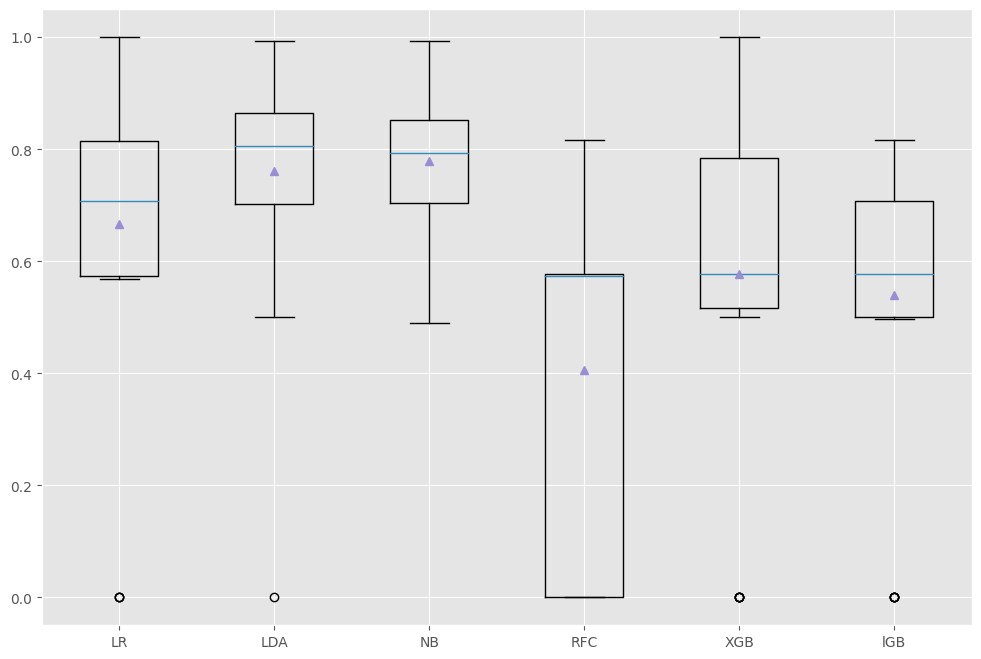

In [25]:
models, names = get_models()
results = eval_models(models, names)
print('Plotting the G-Mean Scores')
plt.boxplot(results, labels=names, showmeans=True);

The better performing models based on G-Means are the LR, LDA and NB. 
THe LDA is better at prediciting oil spills with higher precision than both the LR and NB algorthims. The recall scores suggest that both LDA and NB identify a greater percentage of oil spills than the LR. 

Overall LDA has the highest f1 score and would be the pick. However we still need to improve the identification and prediction of both oil spills. 

## Balanced Logistic Regression with different Scaling techniques

Given there is an imbalance between the classes [0:No-oil spill and 1:oil spill], unless we apply weightage to the classes, the algorithms will always be more bias towards to the majority class. We can apply weights to the classes, where majority class gets a weight w, and minority class gets weight 1-w. This modifies the log loss function and adds a cost penalty to each observation in the data set. 

The class_weights='balanced' calculates the class weights as follows:

for each class is calculated as follows:
w(j) = n_samples / (n_classes * n_sample(j))

w0 = 937 / (2 * 896) = 0.523
w1 = 937 / (2 * 41) =  11.427

Small weights result in a small penalty and a small update to the model coefficients

Large weights result in a large penalty and a large update to the model coefficients

For each observation, the weights are substituted into the log loss function to adjust the cost penalty.

In [26]:
 def get_balanced_LRmodels():
         
    models, names = list(), list()

    #LR Balanced + Standardised
    steps = [('scaler',StandardScaler()), ('m',LogisticRegression(solver='liblinear', class_weight='balanced'))]
    models.append(Pipeline(steps=steps))
    names.append('Balanced-Std')
    
    #LR Balanced + Normalization
    steps = [('t',MinMaxScaler()), ('m',LogisticRegression(solver='liblinear', class_weight='balanced'))]                                                          
    models.append(Pipeline(steps=steps))
    names.append('Balanced-Norm')
    
    #LR Balanced
    models.append(LogisticRegression(solver='liblinear', class_weight='balanced'))
    names.append('Balanced')
    
    # LR Balanced + Power
    steps = [('t1',MinMaxScaler()), ('t2',PowerTransformer()),('m',LogisticRegression(solver='liblinear', class_weight='balanced'))]
    models.append(Pipeline(steps=steps))
    names.append('Balanced-Power')
   
    return models, names    

Balanced-Std G-Mean 0.829 (std 0.132)

               precision    recall  f1-score   support

           0       0.99      0.89      0.94       180
           1       0.27      0.88      0.41         8

    accuracy                           0.89       188
   macro avg       0.63      0.88      0.68       188
weighted avg       0.96      0.89      0.92       188

Balanced-Norm G-Mean 0.833 (std 0.123)

               precision    recall  f1-score   support

           0       0.99      0.88      0.93       180
           1       0.22      0.75      0.34         8

    accuracy                           0.88       188
   macro avg       0.60      0.82      0.64       188
weighted avg       0.96      0.88      0.91       188

Balanced G-Mean 0.860 (std 0.091)

               precision    recall  f1-score   support

           0       0.99      0.87      0.92       180
           1       0.20      0.75      0.32         8

    accuracy                           0.86       188
   macro av

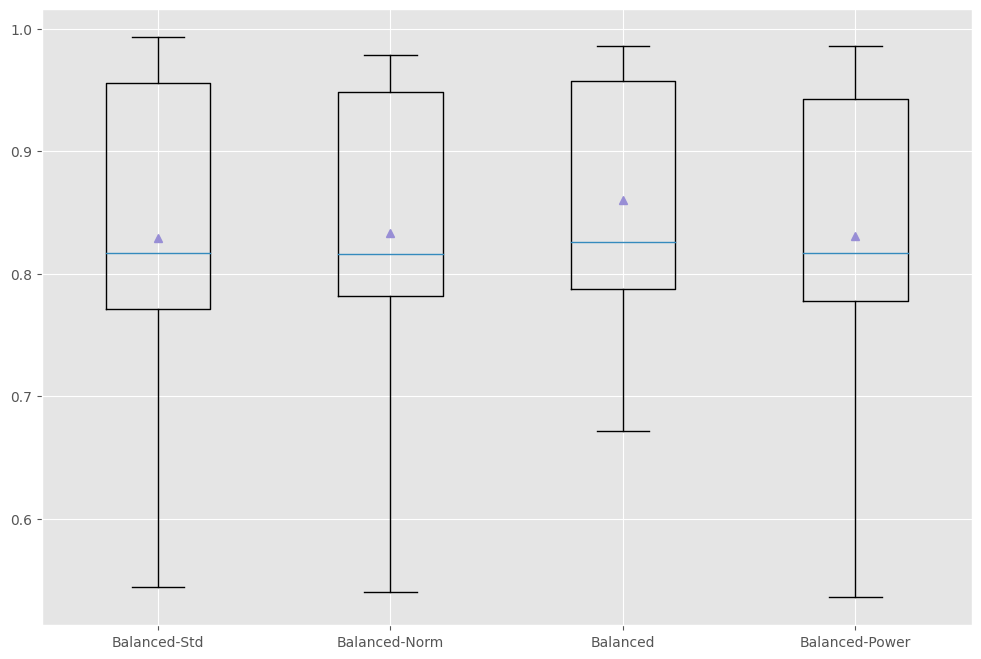

In [27]:
LRmodels, LRnames = get_balanced_LRmodels()
results = eval_models(LRmodels, LRnames)
print('Plotting the G-Mean Scores')
plt.boxplot(results, labels=LRnames, showmeans=True);

Although the Balanced weightage has improved G-Mean scores overall of the Logistic Regression, the recall of Oil Spills has significantly improved at the expense of its precision. The Balanced Model has the best G-Mean performance with much lower f1 score (32). Only the Power transformed LR model has a marginally improved f1 score than original LR without weights.

### Optimising the Weights Manually

Fitting 30 folds for each of 200 candidates, totalling 6000 fits


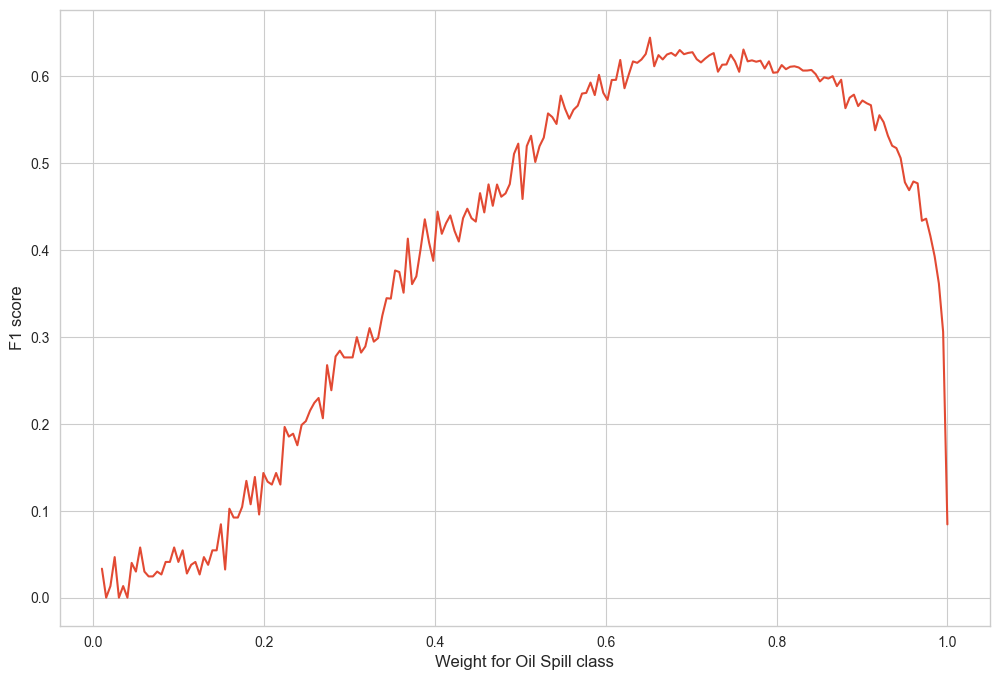

In [66]:
lr = LogisticRegression(solver='liblinear')

#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Using Cross Validation with 10 folds 
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#cv = StratifiedKFold()

#Fitting grid search to the train data with 10 folds
gridsearch = GridSearchCV(estimator=lr, 
                          param_grid=param_grid,
                          cv=cv, 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(X_train, y_train)

#Plotting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weight_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1 - weights)})
sns.lineplot(x=weight_data['weight'], y=weight_data['score'], data=weight_data)
plt.xlabel('Weight for Oil Spill class')
plt.ylabel('F1 score')
plt.show()

#sns.lineplot(weight_data['score'])
#sns.lineplot(weight_data['weight'])
#plt.xticks([round(i/10,1) for i in range(0,11,1)])
#plt.title('Scoring for different class weights', fontsize=24)

The weight for Class 1 (Oil Spill) peaks at around 0.85, meaning 0.15 for Class 0 (non oil spill). We can now use these weights with Stratified Cross Validation and grid search to see performance on the test data.

In [73]:
def get_balanced_LRmodels(weight_zero, weight_one):
         
    models, names = list(), list()

    #LR Balanced + Standardised
    steps = [('scaler',StandardScaler()), ('m',LogisticRegression(solver='liblinear', class_weight={0: weight_zero, 1: weight_one}))]
    models.append(Pipeline(steps=steps))
    names.append('Balanced-Std')
    
    #LR Balanced + Normalization
    steps = [('t',MinMaxScaler()), ('m',LogisticRegression(solver='liblinear', class_weight={0: weight_zero, 1: weight_one}))]                                                          
    models.append(Pipeline(steps=steps))
    names.append('Balanced-Norm')
    
    #LR Balanced
    models.append(LogisticRegression(solver='liblinear', class_weight={0: weight_zero, 1: weight_one}))
    names.append('Balanced')
    
    # LR Balanced + Power
    steps = [('t1',MinMaxScaler()), ('t2',PowerTransformer()),('m',LogisticRegression(solver='liblinear', class_weight={0: weight_zero, 1: weight_one}))]
    models.append(Pipeline(steps=steps))
    names.append('Balanced-Power')
   
    return models, names    

Running the models with optimised weights

Balanced-Std G-Mean 0.820 (std 0.140)

               precision    recall  f1-score   support

           0       0.98      0.96      0.97       180
           1       0.36      0.50      0.42         8

    accuracy                           0.94       188
   macro avg       0.67      0.73      0.70       188
weighted avg       0.95      0.94      0.95       188

Balanced-Norm G-Mean 0.460 (std 0.295)

               precision    recall  f1-score   support

           0       0.97      0.98      0.98       180
           1       0.40      0.25      0.31         8

    accuracy                           0.95       188
   macro avg       0.68      0.62      0.64       188
weighted avg       0.94      0.95      0.95       188

Balanced G-Mean 0.794 (std 0.203)

               precision    recall  f1-score   support

           0       0.99      0.97      0.98       180
           1       0.55      0.75      0.63         8

    accuracy                           0.96       188
   macro av

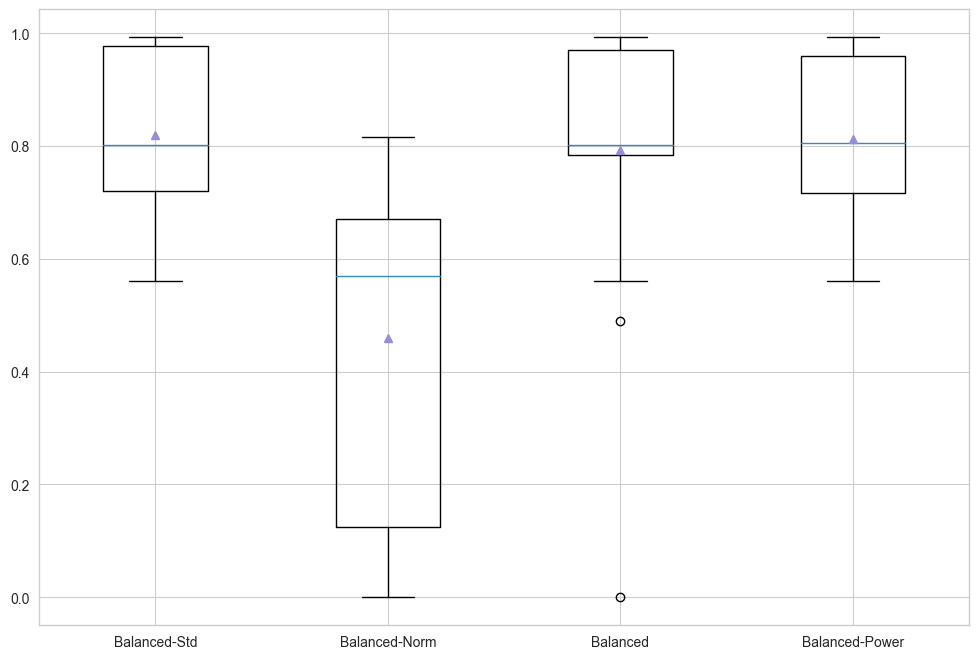

In [75]:
LRmodels, LRnames = get_balanced_LRmodels(0.12, 0.88)
results = eval_models(LRmodels, LRnames)
print('Plotting the G-Mean Scores')
plt.boxplot(results, labels=LRnames, showmeans=True);

Using the optimised weights, we have improved the f1 score of the Balanced LR model (without scaling transform) by almost double (from 32-63), improving the prewcision while keeping the recall constant. The F1 Score of the Balanced Standard transform has marginally improved (41-44), whereas the F1 of Balanced Power transform has decreased.

## Logistic Regression with Sampling Techniques

A combination of SMOTE and ENN are used to add samples (over-sampling) and remove samples (under-sampling) in order to address the class imbalance problem. SMOTE looks at the distance of each data point to its K nearest neighbours and then applies a multiplier to create samples to the class. On the other hand, ENN identifies data points who's class does not match the majority class of its K nearest neighbours.     

Logistic Regression Models with Sampling for each scaling technique 

In [76]:
def get_LRSampled_models():
    
    models, names = list(), list()

    # SMOTEENN
    sampling = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))
    model = LogisticRegression(solver='liblinear')
    steps = [('e', sampling), ('m', model)]
    models.append(Pipeline(steps=steps))
    names.append('LR')

    # SMOTEENN + Norm
    sampling = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))
    model = LogisticRegression(solver='liblinear')
    steps = [('t', MinMaxScaler()), ('e', sampling), ('m', model)]
    models.append(Pipeline(steps=steps))
    names.append('Norm')
    
    # SMOTEENN + Std
    sampling = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))
    model = LogisticRegression(solver='liblinear')
    steps = [('t', StandardScaler()), ('e', sampling), ('m', model)]
    models.append(Pipeline(steps=steps))
    names.append('Std')

    # SMOTEENN + Power
    sampling = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))
    model = LogisticRegression(solver='liblinear')
    steps = [('t1', MinMaxScaler()), ('t2', PowerTransformer()), ('e', sampling), ('m', model)]                                                              
    models.append(Pipeline(steps=steps))
    names.append('Power')
    
    return models, names

LR G-Mean 0.820 (std 0.102)

               precision    recall  f1-score   support

           0       0.99      0.89      0.94       180
           1       0.26      0.88      0.40         8

    accuracy                           0.89       188
   macro avg       0.63      0.88      0.67       188
weighted avg       0.96      0.89      0.92       188

Norm G-Mean 0.833 (std 0.121)

               precision    recall  f1-score   support

           0       0.99      0.88      0.93       180
           1       0.22      0.75      0.34         8

    accuracy                           0.88       188
   macro avg       0.60      0.82      0.64       188
weighted avg       0.96      0.88      0.91       188

Std G-Mean 0.821 (std 0.130)

               precision    recall  f1-score   support

           0       0.99      0.87      0.93       180
           1       0.23      0.88      0.37         8

    accuracy                           0.87       188
   macro avg       0.61      0.87  

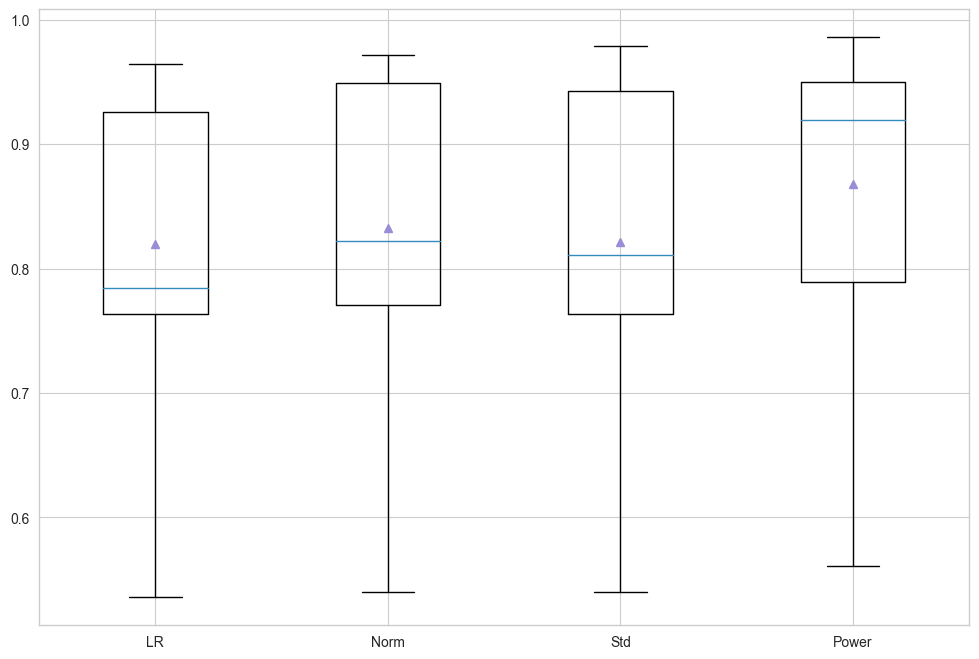

In [77]:
models, names = get_LRSampled_models()
results = eval_models(models, names)
print('Plotting the G-Mean Scores')
plt.boxplot(results, labels=names, showmeans=True);

SMOTE ENN has increased the recall to around 88% for most models meaning better identification of oil spills than the balanced weights approach. But it has compromised the precision performance by more than almost half in the case of Logistic Regression (without scaling) meaning a greater portion of incorrect predictions of oil spills. The Power transformed LR model is the best performing with SMOTEENN, with best precision (0.32) and f1 score (.47)  

## Selected Model

The choice of model is thus down selected to 2, both having the best f1 scores in their category:
* Non Scaled LR with manually optimised weights
* SMOTEENN Power transformed

The first has a better overall f1 score, the 2nd has a higher recall for the oil spill class.

selected model Balanced
LogisticRegression(class_weight={0: 0.12, 1: 0.88}, solver='liblinear')


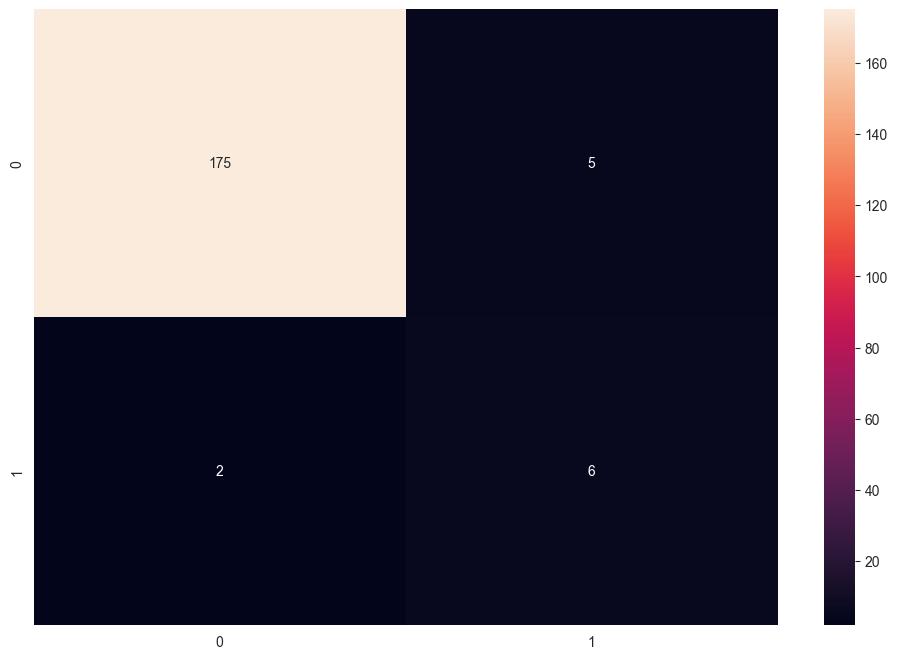

In [83]:
models, names = get_balanced_LRmodels(0.12, 0.88)
sel_name = names[2]
sel_model = models[2]
print('selected model', sel_name)
print(sel_model)

classification_scores, y_pred = eval_model_crossVal(sel_model, X_train, y_train)

cm = confusion_matrix(y_test, y_pred)
f = sns.heatmap(cm, annot=True, fmt='d')




selected model Power
Pipeline(steps=[('t1', MinMaxScaler()), ('t2', PowerTransformer()),
                ('e',
                 SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))),
                ('m', LogisticRegression(solver='liblinear'))])


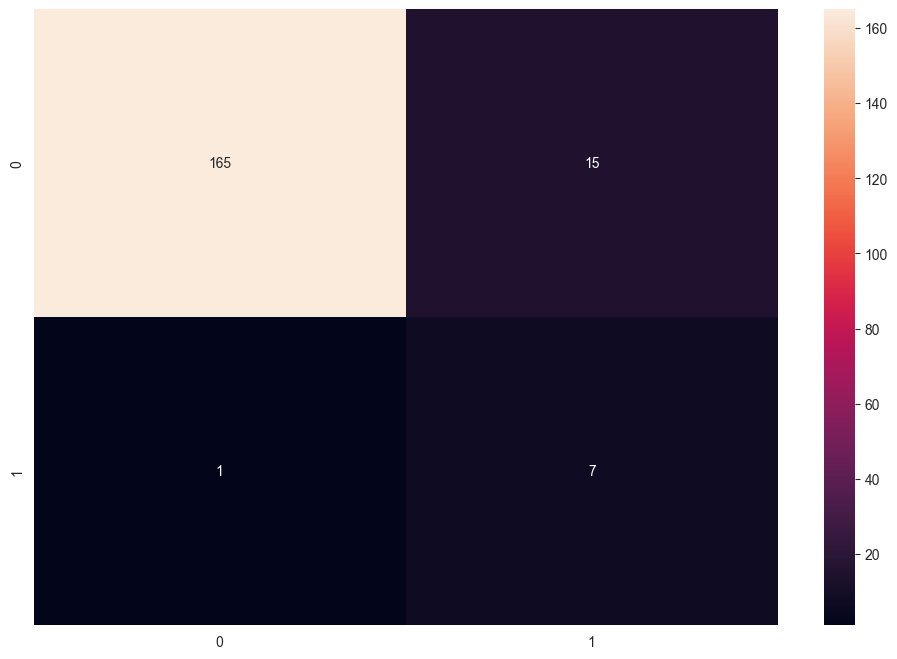

In [84]:
models, names = get_LRSampled_models()
sel_name = names[3]
sel_model = models[3]
print('selected model', sel_name)
print(sel_model)

classification_scores, y_pred = eval_model_crossVal(sel_model, X_train, y_train)

cm = confusion_matrix(y_test, y_pred)
f = sns.heatmap(cm, annot=True, fmt='d')


The model of choice is the **Non Scaled LR with manually optimised weights**. Although it identifies less oil spills (10 more  false negatives), it predicts a great portion of oil spills that it identifies ie. better precision.